<a href="https://colab.research.google.com/github/Jaewon45/ESAA_2022/blob/main/1107_TextAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** p512-p516
## 06. 토픽 모델링(topic modeling) - 20뉴스그룹
- 토픽 모델링 : 문서 집합에 숨어 있는 주제를 찾아냄
- 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출
- 머신러닝 기반의 토픽 모델링에 자주 사용되는 기법 
  - LSA(Latent Semantic Analysis)
  - LDA (Latent Dirichlet Allocation) : Count 기반의 벡터화만 사용

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
       'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'),
                            categories=cats, random_state=0)

# LDA는 Count기반의 벡터화만 적용
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english',
                            ngram_range=(1,2))

feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [ ]:
# LDA 토픽 모델링 수행
lda = LatentDirichletAllocation(n_components=8, random_state=0) # n_components로 토픽 개수 조정
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

- LatentDirichletAllocation 객체가 components_ 속성값 가지게 됨
 - components_는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 가짐
 - 높은 값일수록 해당 word 피처는 토픽의 중심 word

In [ ]:
print(lda.components_.shape) 
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

- 8개의 토픽별로 1000개의 word피처의 해당 토픽별 연관도 값임

In [ ]:
# 각 토픽별로 연관도가 높은 순으로 Word 나열

def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)
        
        # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]
        
        # top_indexes 대상인 인덱스별로 feature_nemas에 해당하는 word feaeture 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)
        
# CountVectorizer객체 내의 전체 word 명칭을 get_feature_neames를 통해 추출
feature_names = count_vect.get_feature_names()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


- Topic #0, #5, #7 : 명확하지 않고 일반적인 단어가 추출됨
- 나머지 Topic은 관련된 주제어가 추출됨

*** p529~p543
## 08. 문서 유사도
### 문서 유사도 측정 방법 - 코사인 유사도
- 코사인 유사도 
 - 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반
 - 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용
 - 두 벡터 A와 B의 내적 값 : $A*B =∥A∥∥B∥ cos \theta$
 - 유사도 : $similarity = cos\theta = \frac{A*B}{∥A∥∥B∥} = \frac{\sum^{n}_{i=1} A_i B_i}{\sqrt{\sum^{n}_{i=1} A_i^2}\sqrt{\sum^{n}_{i=1} B_i^2}}$
 
 
 - 문자를 피처 벡터화 변환시 차원이 매우 많은 희소 행렬이 되기 쉬움
 - 희소 행렬 기반에서 문서와 문서 벡터간의 크기에 기반한 유사도 지표는 정확도가 떨어지기 쉬움
 - 문서가 긴 경우 단어의 빈도수가 많을 것이기 때문에 빈도수에만 기반해서는 공정한 비교를 할 수 없음

In [ ]:
import numpy as np

# 두개의 넘파이 배열에 대한 코사인 유사도 계산
def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_12 = (np.sqrt(sum(np.square(v1)))) * np.sqrt(sum(np.square(v2)))
    similarity = dot_product / norm_12
    
    return similarity

from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
           'if you take the red pill, you stay in Wonderland',
           'if you take the red pill, I show you how deep the rabbit hole goes']

# 유사도 비교 위해 문서를 TF-IDF로 벡터화된 행렬로 변환
tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape) # 3,18

(3, 18)


In [ ]:
# TFidVctorizer로 transform()한 결과는 희소행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫번째 문장과 두번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 첫번째 문장과 두번째 문장의 피처 벡터로 두개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:3f}'.format(similarity_simple))

vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402078
문장 1, 문장 3 Cosine 유사도: 0.404250
문장 2, 문장 3 Cosine 유사도: 0.404250


- 사이킷런의 cosine_similarity API
 - 희소 행렬, 밀집 행렬 모두 가능하며 행렬, 배열 모두 가능
 - 밀집행렬로 변환하는 등의 작업 필요 없음

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair) # 쌍으로 코사인유사도 계산

[[1.         0.40207758 0.40425045]]


In [ ]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [ ]:
import string
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
  return nltk.word_tokenize(text.lower().translate(remove_punct_dict))

In [ ]:
import pandas as pd
import glob, os
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

path = r'/content/drive/MyDrive/esaa/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('||')[-1]
    filename = file_.split(',')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label']=cluster_label

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
# 별도의 TF-IDF 벡터화를 수행하지 않고 TfidfVectorizer로 만들어진 데이터에서 그대로 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ', comparison_docname, '와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화된 문서들의 DataFrame Index: Int64Index([0, 2, 4, 10, 11, 13, 18, 24, 26, 29, 30, 34, 35, 42, 47, 50], dtype='int64')
##### 비교 기준 문서명  /content/drive/MyDrive/esaa/OpinosisDataset1.0/topics/location_holiday_inn_london.txt.data 와 타 문서 유사도######
[[1.         0.19425276 0.16288888 0.06922119 0.06347221 0.18281085
  0.66815556 0.41443806 0.28981808 0.05349529 0.07324257 0.16851787
  0.1421237  0.17802431 0.17327809 0.22415924]]


Text(0.5, 1.0, '/content/drive/MyDrive/esaa/OpinosisDataset1.0/topics/location_holiday_inn_london.txt.data')

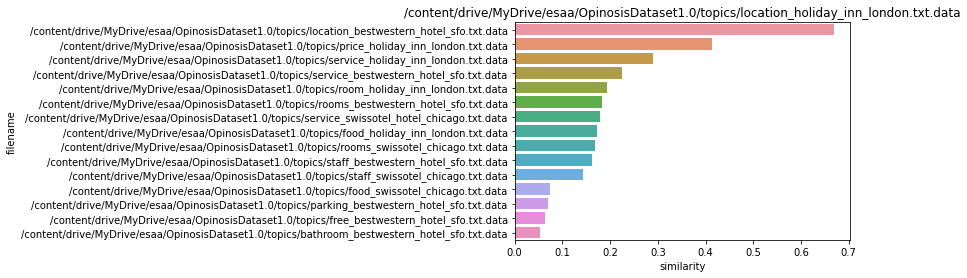

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

- 첫번째 문서인 샌프란시스코의 베스트웨스턴호텔 화장실 리뷰와 가장 비슷한 문서 : location_bestwestern_hotel_sfo

## 09. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석
### 한글 NLP 처리의 어려움
- 띄어쓰기, 다양한 조사로 인한 한글 언어 처리의 어려움

### KoNLPy 소개
- 파이썬의 대표적인 한글 형태소 패키지
- 잘 만들어진 한글 형태소 엔진을 파이썬 래퍼 기반으로 재작성한 패키지
- Java가 먼저 설치돼 있어야 하며 별도 모듈 JPype1도 필요함

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/esaa/ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [ ]:
train_df['label'].value_counts() 
# 1이 긍정, 0이 부정

0    75173
1    74827
Name: label, dtype: int64

In [ ]:
import re

# Null 값을 공백으로 변환
train_df = train_df.fillna(' ')
# 문자가 아닌 숫자의 경우 단어적인 의미로 부족하므로 공백으로 변환
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함)
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r"\d+"," ", x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/esaa/ratings_test.txt', sep="\t")
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r"\d+"," ", x))

# Id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

- Twitter 객체의 morphs() 메서드는 입력 인자로 들어온 문장을 형태소 단어 형태로 트큰화해 리스트 객체로 반환
- Twitter 클래스는 SNS 분석에 적합함

In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 2.87 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 843 kB/s 
     |████████████████████████████████| 453 kB 77.0 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-10-27 08:56:24--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.2, 18.205.93.1, 18.205.93.0, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.2|:443.

In [ ]:
from konlpy.tag import Twitter

# 각 문장을 형태소 단어로 토큰화
twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 현태로 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 메서드를 이용한 tokenizer를 사용
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {'C': [1,3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid = params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

{'C': 3.5} 0.8593


In [ ]:
# 테스트 세트를 이용해 최종 감성 예측 분석 시행
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidVectorizer를 이용해 텍스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도:  0.86186
